In [36]:
import numpy as np
import matplotlib.pyplot as plt
import ross as rs

In [37]:
steel = rs.materials.steel

In [46]:
number_of_elements = [2, 3, 4, 5, 6, 7, 8]

In [47]:
def create_rotor(n_el, R):
    """Create example rotor with given number of elements and R ration."""
    L_total = 1
    D = R * L_total

    shaft = [
        rs.ShaftElement(1./(n_el), i_d=0, o_d=D, material=steel,
                        shear_effects=False, rotary_inertia=False)
        for i in range(n_el)
    ]

    bearings = [
        rs.BearingElement(0, kxx=1e15, cxx=0),
        rs.BearingElement(n_el, kxx=1e15, cxx=0)
    ]
    
    return rs.Rotor(shaft_elements=shaft, bearing_seal_elements=bearings, sparse=False)

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()


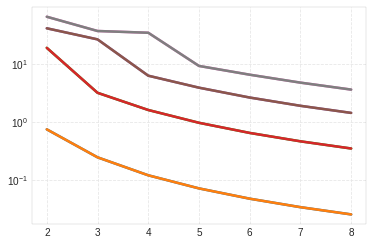

In [117]:
# create reference rotor with 80 elements
rotor_80 = create_rotor(80, R)
rotor_80.run()

n_eigen = 8 
errors = np.zeros([len(number_of_elements), n_eigen])

for i, n_el in enumerate(number_of_elements):
    rotor = create_rotor(n_el, R)
    rotor.run()
    errors[i, :] = abs(
        100 * (rotor.wn[:n_eigen] - rotor_80.wn[:n_eigen]) 
        / rotor_80.wn[:n_eigen])

fig, ax = plt.subplots()
for i in range(8):
    ax.semilogy(number_of_elements, errors[:, i])

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry,

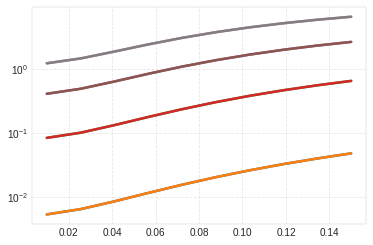

In [116]:
# create reference rotor with 80 elements
n_el = 6 
R_list = np.linspace(0.01, 0.15, 10)

n_eigen = 8 
errors = np.zeros([len(R_list), n_eigen])

for i, R in enumerate(R_list):
    rotor_ref = create_rotor(100, R)
    rotor_ref.rotary_inertia = True
    rotor_ref.shear_effects = True
    rotor_ref.run()

    rotor = create_rotor(n_el, R)
    rotor.run()
    errors[i, :] = abs(
        100 * (rotor.wn[:n_eigen] - rotor_ref.wn[:n_eigen]) 
        / rotor_ref.wn[:n_eigen])

fig, ax = plt.subplots()
for i in range(8):
    ax.semilogy(R_list, errors[:, i])